In [2]:
#!pip install nbformat
#!pip install statsmodels
#!pip install -U kaleido

In [3]:
#import libraries
import pandas as pd # data prepocessing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns # data visualisation
import missingno as msno
from collections import Counter
import numpy as np
import plotly.express as px
import plotly.io as pio
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
import os

In [4]:
import os

# Create folder for charts
os.makedirs("charts", exist_ok=True)

In [5]:
# Upload the data into jupyter
df = pd.read_csv("healthcare_dataset.csv")

In [6]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        31/01/2024   
1   LesLie TErRy   62    Male         A+           Obesity        20/08/2019   
2    DaNnY sMitH   76  Female         A-           Obesity        22/09/2022   
3   andrEw waTtS   28  Female         O+          Diabetes        18/11/2020   
4  adrIENNE bEll   43  Female        AB+            Cancer        19/09/2022   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306          328         Urgent     02/02/2024  Paracetamol   
1    33643.327287          265      Emergency     26/08/2019    Ibuprofen   
2    27955.096079          205      Emergency     07/10/2022      Aspirin   
3    37909.782410          450       Elective     18/12/2020    Ibuprofen   
4    14238.317814          458         Urgent     09/10/2022   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
# changed the format of the columns "Date of Admission" and "Discharge Date" to datetime type

for date in ['Date of Admission','Discharge Date']:
    df[date] = pd.to_datetime(df[date], dayfirst=True, errors="coerce")



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [ ]:
# check for unique values in the "Medical Condition" column
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [ ]:
# check for duplicates
print("Duolicates Exist:", (df.duplicated().any()))
print("Number of duplicate:", (df.duplicated().sum()))
(df[df.duplicated()])

Duolicates Exist: True
Number of duplicate: 534


Name  Age  Gender Blood Type Medical Condition  \
50023        Samuel joYCe   56    Male         O+         Arthritis   
50040    KIMBErly vasqueZ   26    Male         A-           Obesity   
50055      SCoTT tHOrNton   55  Female         B-           Obesity   
50070         wiLliam LEe   27  Female         O+         Arthritis   
50078  chRistOPheR NoRrIs   38    Male        AB-         Arthritis   
...                   ...  ...     ...        ...               ...   
55461      connOR coMPTon   63    Male         A+            Asthma   
55462       alYSsA mIlLER   35  Female         A-          Diabetes   
55464        ChRIs huGHeS   35  Female        AB-           Obesity   
55484     keNNEtH alvarez   80    Male         O+            Cancer   
55491       lInDA grIFfin   47  Female         O+           Obesity   

      Date of Admission             Doctor                    Hospital  \
50023        2022-11-03     Krista Hartman              Thomas-Ballard   
50040        2023-10-23   Jennifer Bennett                   Cowan Inc   
50055        2021-04-08      Joshua Ingram                  Keller LLC   
50070        2020-01-31  Lauren Montgomery               Winters-Simon   
50078        2023-01-14       Denise Blair                 Inc Morales   
...                 ...                ...                         ...   
55461        2021-08-21     Jonathan Allen  and Willis Mullins, Bowers   
55462        2022-06-30         Ryan Price           Shelton-Gallagher   
55464        2024-02-28      Katelyn Perry                Lyons-Hansen   
55484        2022-05-05      Andrew Conner               Sons Mayo and   
55491        2020-06-21     Danielle Davis    and King Jordan Johnson,   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
50023   UnitedHealthcare    15654.830587          157         Urgent   
50040   UnitedHealthcare    38142.109678          313         Urgent   
50055           Medicare    30894.904511          455         Urgent   
50070              Cigna    46229.434901          153       Elective   
50078           Medicare     9072.127142          452      Emergency   
...                  ...             ...          ...            ...   
55461           Medicare     1936.702824          375      Emergency   
55462   UnitedHealthcare     2210.460898          289       Elective   
55464         Blue Cross    11889.154513          128      Emergency   
55484              Cigna    45653.802310          114       Elective   
55491              Aetna    15715.551079          310      Emergency   

      Discharge Date   Medication  Test Results  
50023     2022-11-22      Aspirin  Inconclusive  
50040     2023-11-18   Penicillin      Abnormal  
50055     2021-04-15      Aspirin      Abnormal  
50070     2020-02-13      Lipitor        Normal  
50078     2023-02-12   Penicillin        Normal  
...              ...          ...           ...  
55461     2021-09-16  Paracetamol        Normal  
55462     2022-07-27   Penicillin        Normal  
55464     2024-03-14  Paracetamol      Abnormal  
55484     2022-05-17      Aspirin        Normal  
55491     2020-06-25      Lipitor      Abnormal  

[534 rows x 15 columns]

In [ ]:
# drop duplicates
df = df.drop_duplicates()

In [ ]:
# Confirm no duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object        


In [ ]:
# filter for obese patients records.
obesity_df = df[df["Medical Condition"].str.contains("Obesity", case=False, na=False)].copy()

obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9146 entries, 1 to 55496
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                9146 non-null   object        
 1   Age                 9146 non-null   int64         
 2   Gender              9146 non-null   object        
 3   Blood Type          9146 non-null   object        
 4   Medical Condition   9146 non-null   object        
 5   Date of Admission   9146 non-null   datetime64[ns]
 6   Doctor              9146 non-null   object        
 7   Hospital            9146 non-null   object        
 8   Insurance Provider  9146 non-null   object        
 9   Billing Amount      9146 non-null   float64       
 10  Room Number         9146 non-null   int64         
 11  Admission Type      9146 non-null   object        
 12  Discharge Date      9146 non-null   datetime64[ns]
 13  Medication          9146 non-null   object        
 

In [ ]:
# Create a new column "Number of Days Admitted" by subtracting "Discharge Date" from "Date of Admission"
# Create a new column "Stay_Category" based on "Number of Days Admitted"
# Short Stay (<15 days) if less than 15 days, otherwise Long Stay (≥15 days)
obesity_df["Number of Days Admitted"] = (obesity_df["Discharge Date"] - obesity_df["Date of Admission"]).dt.days
obesity_df["Stay_Category"] = obesity_df["Number of Days Admitted"].apply(
    lambda x: "Short Stay (<15 days)" if x < 15 else "Long Stay (≥15 days)"
)

In [ ]:
# View the first 5 rows to confirm new columns
obesity_df.head()

Name  Age  Gender Blood Type Medical Condition  \
1          LesLie TErRy   62    Male         A+           Obesity   
2           DaNnY sMitH   76  Female         A-           Obesity   
15   MS. nAtalIE gAMble   46  Female        AB-           Obesity   
17  mRS. jamiE cAMPBELl   38    Male        AB-           Obesity   
25     PeTER fiTzgeRaLd   73    Male        AB+           Obesity   

   Date of Admission            Doctor                    Hospital  \
1         2019-08-20   Samantha Davies                     Kim Inc   
2         2022-09-22  Tiffany Mitchell                    Cook PLC   
15        2023-01-01   Maria Dougherty              Cline-Williams   
17        2020-03-08        Justin Kim  Torres, and Harrison Jones   
25        2020-05-15  Angela Contreras               Garner-Bowman   

   Insurance Provider  Billing Amount  Room Number Admission Type  \
1            Medicare    33643.327287          265      Emergency   
2               Aetna    27955.096079          205      Emergency   
15         Blue Cross    12263.357425          465       Elective   
17              Cigna    17440.465444          449         Urgent   
25           Medicare    19746.832008          162         Urgent   

   Discharge Date   Medication  Test Results  Number of Days Admitted  \
1      2019-08-26    Ibuprofen  Inconclusive                        6   
2      2022-10-07      Aspirin        Normal                       15   
15     2023-01-11      Aspirin  Inconclusive                       10   
17     2020-04-02  Paracetamol      Abnormal                       25   
25     2020-05-20      Aspirin      Abnormal                        5   

            Stay_Category  
1   Short Stay (<15 days)  
2    Long Stay (≥15 days)  
15  Short Stay (<15 days)  
17   Long Stay (≥15 days)  
25  Short Stay (<15 days)

In [18]:
obesity_df.describe()

Age              Date of Admission  Billing Amount  \
count  9146.000000                           9146     9146.000000   
mean     51.233217  2021-10-30 08:33:35.307238144    25804.361902   
min      13.000000            2019-05-08 00:00:00    -1310.272895   
25%      34.000000            2020-07-28 00:00:00    13719.640774   
50%      51.000000            2021-10-24 00:00:00    26145.578798   
75%      68.000000            2023-02-01 00:00:00    37956.804995   
max      89.000000            2024-05-07 00:00:00    52024.726443   
std      19.538759                            NaN    14082.310909   

       Room Number                 Discharge Date  Number of Days Admitted  
count  9146.000000                           9146              9146.000000  
mean    300.547999  2021-11-14 19:18:10.312705024                15.447627  
min     101.000000            2019-05-09 00:00:00                 1.000000  
25%     201.000000            2020-08-14 00:00:00                 8.000000  
50%     301.000000            2021-11-11 00:00:00                15.000000  
75%     399.000000            2023-02-18 00:00:00                23.000000  
max     500.000000            2024-06-06 00:00:00                30.000000  
std     115.324441                            NaN                 8.685989

In [ ]:
# Counts of patients with negative length of stay
negative__los_counts = (obesity_df['Number of Days Admitted'] < 0).sum()
print(negative__los_counts)

In [ ]:
# Statistics for categorical columns
obesity_df.describe(include='object').T

count unique                   top  freq
Name                9146   8292           YVoNne riCe     2
Gender              9146      2                  Male  4573
Blood Type          9146      8                    B-  1182
Medical Condition   9146      1               Obesity  9146
Doctor              9146   7862       Andrew Williams     7
Hospital            9146   7640             Ltd Smith    11
Insurance Provider  9146      5            Blue Cross  1872
Admission Type      9146      3             Emergency  3100
Medication          9146      5            Penicillin  1872
Test Results        9146      3              Abnormal  3104
Stay_Category       9146      2  Long Stay (≥15 days)  4843

In [20]:
print(obesity_df[obesity_df['Name'] == 'jennifer smith'])

Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Number of Days Admitted, Stay_Category]
Index: []


In [21]:
obesity_df['Name'] = obesity_df['Name'].str.lower()

In [23]:
#px.scatter(obesity_df, x='Age', y='Billing Amount', color= 'Gender')

In [ ]:
# Check for null values
null_vals = obesity_df.isnull().sum()
null_vals

Name                       0
Age                        0
Gender                     0
Blood Type                 0
Medical Condition          0
Date of Admission          0
Doctor                     0
Hospital                   0
Insurance Provider         0
Billing Amount             0
Room Number                0
Admission Type             0
Discharge Date             0
Medication                 0
Test Results               0
Number of Days Admitted    0
Stay_Category              0
dtype: int64

In [ ]:
# Create a new dataframe with only numerical columns
numerical_data = obesity_df.select_dtypes(include="number")
numerical_data.head()

Age  Billing Amount  Room Number  Number of Days Admitted
1    62    33643.327287          265                        6
2    76    27955.096079          205                       15
15   46    12263.357425          465                       10
17   38    17440.465444          449                       25
25   73    19746.832008          162                        5

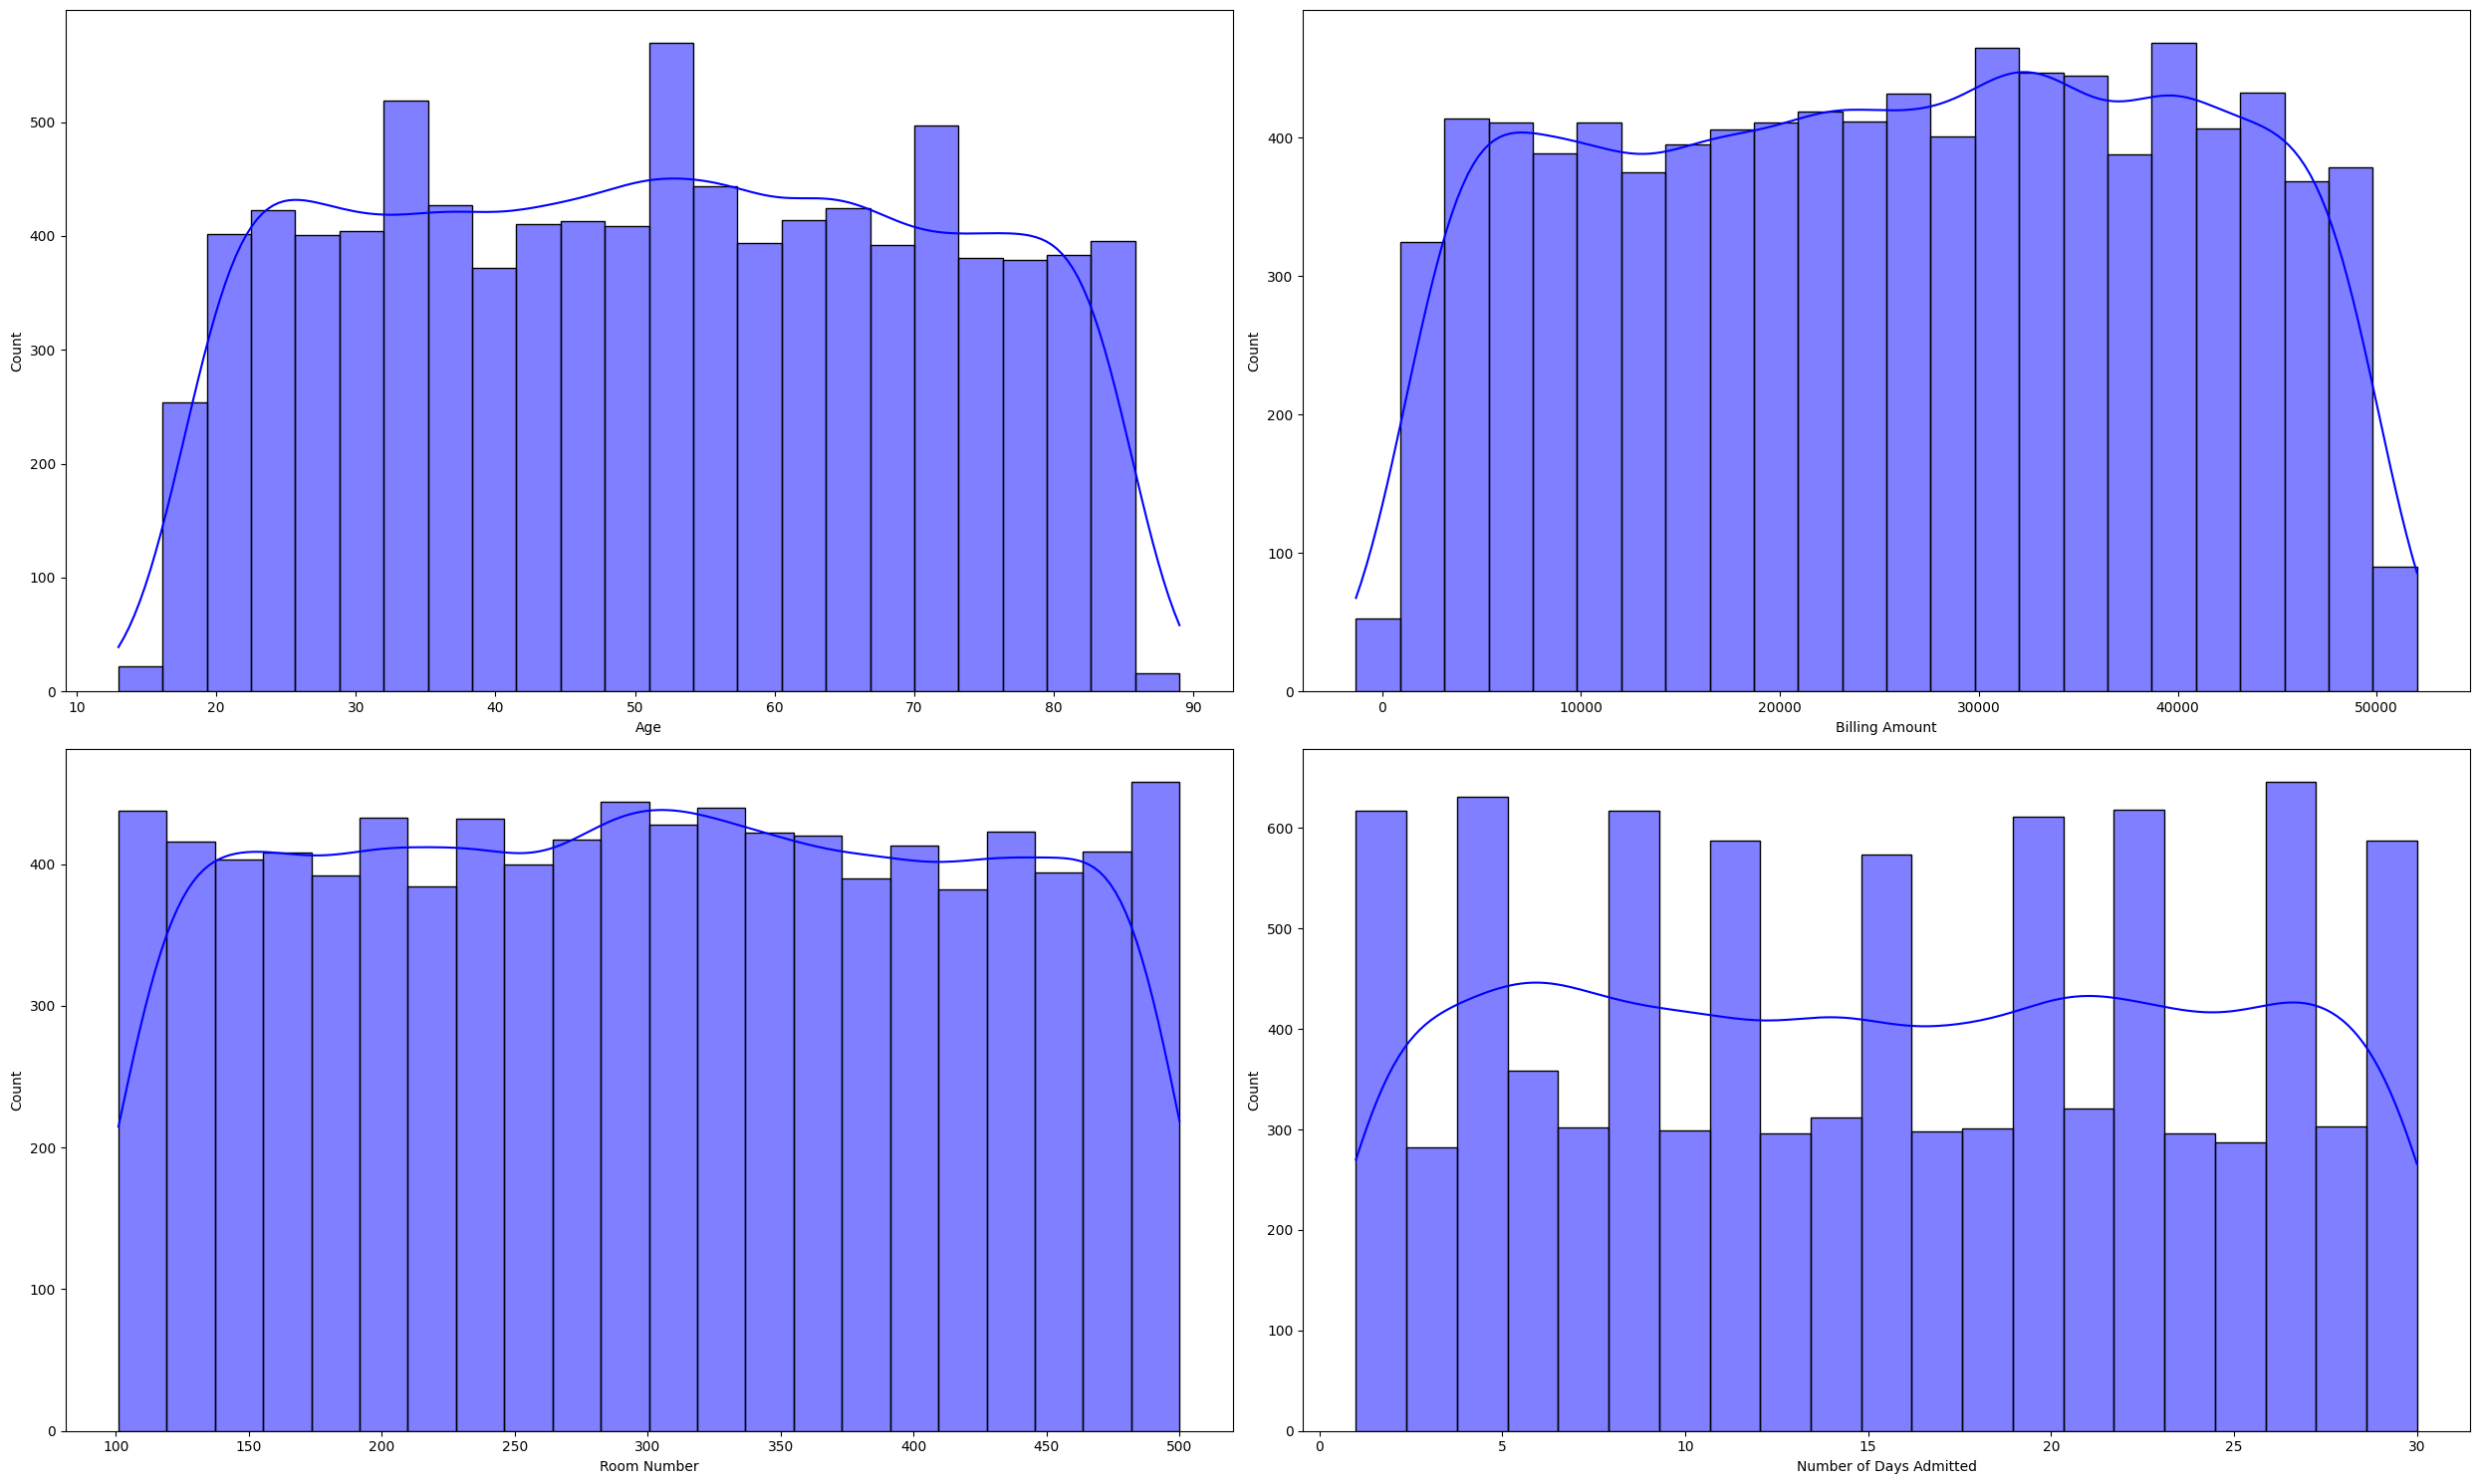

In [ ]:
# Plot histogram to check the data distribution of numerical columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))
ax = axes.flatten()

for index, column_name in enumerate(numerical_data):
    sns.histplot(obesity_df[column_name], ax=ax[index], kde=True, color="blue")


plt.tight_layout()
plt.show()

Total number of patients: 54966
Number of Obese: 9146


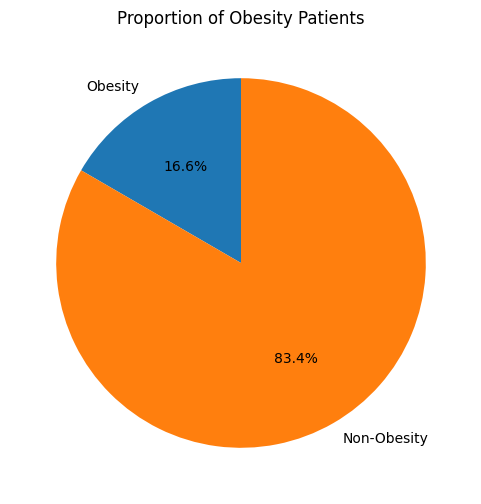

In [29]:
total_patients = len(df)
obesity_patients = len(obesity_df)
print("Total number of patients:", len(df))
print("Number of Obese:", len(obesity_df))


# values
total_patients = len(df)
obesity_patients = len(obesity_df)
non_obesity_patients = total_patients - obesity_patients

# labels & sizes
labels = ["Obesity", "Non-Obesity"]
sizes = [obesity_patients, non_obesity_patients]

# pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Proportion of Obesity Patients")
plt.show()


In [ ]:
# create a new column 'obesity' from the entire 'Medical Condition' column and assign values such as 'obesity' or 'non-obesity'
df['obesity'] = np.where(df['Medical Condition'].str.lower() == 'obesity', 'obesity', 'non-obesity')
df['obesity'].head()

0    non-obesity
1        obesity
2        obesity
3    non-obesity
4    non-obesity
Name: obesity, dtype: object

In [31]:
import nbformat
print(nbformat.__version__)

5.10.4


Create a pie chart that shows the proportion of obese
#patients in the dataset:

In [ ]:
# Create a pie chart that shows the proportion of obese
# patients in the dataset
custom_colors = [ "#9A4A08", "#F2AA70"]  # replace/add colors as needed
fig = px.pie(
    df, 
    names='obesity', 
    width=500,   # smaller width for PowerPoint
    height=400,   # smaller height
    color_discrete_sequence=custom_colors,  # your custom colors
)

# Set black background and white text
fig.update_layout(
    paper_bgcolor='black',   # background outside the plot
    plot_bgcolor='black',    # background inside the plot
    font=dict(color='white', size=12), # font for title/labels
    title=dict(font=dict(color='white', size=16))
)

# Update facet titles to white
for annotation in fig.layout.annotations:
    annotation.font.color = "white"
    annotation.font.size = 14  # slightly smaller facet titles

# Update slice labels to white and smaller to fit inside donut
fig.update_traces(
    textinfo='percent+label',  
    textfont_size=12,          # smaller font
    textfont_color='white'
)

# Remove grid lines (mainly affects axes if they appear)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()

# Save image
fig.write_image("charts/gender_distribution_total_dataset.png", scale=2)




Gender Distribution of obese patients:

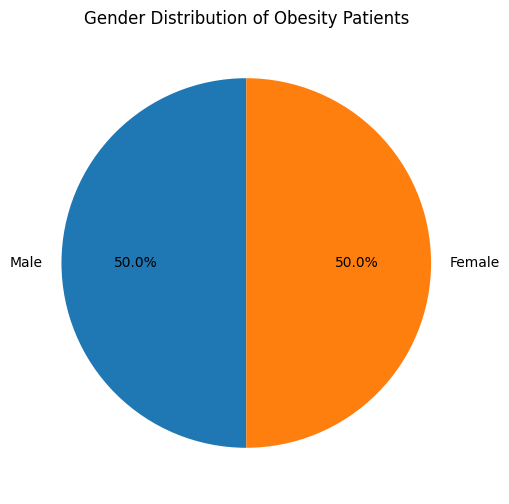

Gender
Male      4573
Female    4573
Name: count, dtype: int64


In [33]:


# Get gender distribution (counts)
gender_counts = obesity_df["Gender"].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Gender Distribution of Obesity Patients")
plt.show()
print(gender_counts)

In [34]:

#custom_colors = ['#FF5733', '#33FF57', '#3357FF', '#F0FF33'] 
#  # replace/add colors as needed
custom_colors = [ "#6C2E04", "#FBAA78"]  # replace/add colors as needed
fig = px.pie(
    obesity_df, 
    names='Gender', 
    width=500,   # adjust width for PowerPoint
    height=400,   # adjust height for PowerPoint
    color_discrete_sequence=custom_colors,  # your custom colors
)

# Set black background and white text
fig.update_layout(
    paper_bgcolor='black',   # background outside the plot
    plot_bgcolor='black',    # background inside the plot
    font=dict(color='white', size=12), # smaller font for title/labels
)

# Update facet titles to white
for annotation in fig.layout.annotations:
    annotation.font.color = "white"
    annotation.font.size = 14  # slightly smaller facet titles

# Update slice labels to white and smaller to fit inside donut
fig.update_traces(
    textinfo='percent+label',  
    textfont_size=12,          # smaller font
    textfont_color='white'
)

# Remove grid lines (mainly affects axes if they appear)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)



fig.show()
fig.write_image("charts/gender_distribution.png", scale=2)
 

In [35]:
# Define a function to categorize age
def age_group(x):
    if x < 18:
        return "Children (13-17)"
    elif x >=18 and x <= 59:
        return "Adults(18-59)"
    else:
        return "Elderly (60+)"

# Apply function to create a new column
obesity_df["Age_group"] = obesity_df["Age"].apply(age_group)

# Count cases in each group
age_group_counts = obesity_df["Age_group"].value_counts().sort_values(ascending=True)

age_group_df=pd.DataFrame({'Age_group': ['Children', 'Elderly','Adult'],'count':[27, 5712,3407]})


print(age_group_counts)







Age_group
Children (13-17)      27
Elderly (60+)       3407
Adults(18-59)       5712
Name: count, dtype: int64


In [36]:
# Sort DataFrame by count descending
age_group_df = age_group_df.sort_values('count', ascending=False)

# Optional: set Age_group as categorical to preserve order in plot
age_group_df['Age_group'] = pd.Categorical(
    age_group_df['Age_group'],
    categories=age_group_df['Age_group'],
    ordered=True
)

custom_colors = [ "#F46A0E"]  # Add colors as needed

fig = px.bar(
    age_group_df,
    x='Age_group',
    y='count',
    text='count',
    title="Distribution of Obese Patients by Age Group",
    labels={'age_group': 'Age Group', 'count': 'Number of Patients'},
    color_discrete_sequence=custom_colors,
    width=600,   # adjust width for PowerPoint
    height=500,  # adjust height for PowerPoint 
    


    )
# Update aesthetics
fig.update_traces(textposition='outside', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(
    xaxis=dict(tickangle=0),
    legend_title="Test Result",
    bargap=0.15,
    bargroupgap=0.1,
    paper_bgcolor='black',   # background outside the plot
    plot_bgcolor='black',    # background inside the plot
    font=dict(color='white'), 
)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)




    

fig.show()
fig.write_image("charts/obese_patients_by_age_group.png", scale=2)


In [66]:
# Group gender by agegroup ---
age_gender_counts = obesity_df.groupby(["Age_group", "Gender"]).size().reset_index(name="Count")

# --- Plot ---
fig = px.bar(
    age_gender_counts,
    x="Age_group",
    y="Count",
    color="Gender",
    barmode="group",  # side-by-side bars
    text="Count",
    labels={"Count": "Number of Patients", "Age_group": "Age Group"},
    color_discrete_sequence=["#FF8533", "#ECA271"],
    width=700,   # adjust width for PowerPoint
    height=500,  # adjust height for PowerPoint 
)

# --- Aesthetics ---
fig.update_traces(textposition="outside")
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    xaxis=dict(tickangle=0, showgrid=False),
    yaxis=dict(showgrid=False),
    legend_title="Gender"
)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)

fig.show()
fig.write_image("charts/obese_patients_by_age_group.png", scale=2)

print(age_gender_counts)

          Age_group  Gender  Count
0     Adults(18-59)  Female   2857
1     Adults(18-59)    Male   2855
2  Children (13-17)  Female     15
3  Children (13-17)    Male     12
4     Elderly (60+)  Female   1701
5     Elderly (60+)    Male   1706


In [38]:
# Group gender by agegroup
age_gender_counts = obesity_df.groupby(["Age_group", "Gender"]).size().reset_index(name="Count")

# Calculate percentage within each Age_group (fix with transform)
age_gender_counts["Percentage"] = (
    age_gender_counts.groupby("Age_group")["Count"]
    .transform(lambda x: round(100 * x / x.sum(), 1))
)

# Add percentage to text labels (Count + %)
age_gender_counts["Label"] = (
    age_gender_counts["Count"].astype(str) + " (" + age_gender_counts["Percentage"].astype(str) + "%)"
)

# --- Plot ---
fig = px.bar(
    age_gender_counts,
    x="Age_group",
    y="Count",
    color="Gender",
    barmode="group",  # side-by-side bars
    text="Label",     # show Count + Percentage
    title="Gender Distribution Across Age Groups (Obese Patients)",
    labels={"Count": "Number of Patients", "Age_group": "Age Group"},
    color_discrete_sequence=["#FF8533", "#ECA271"],
    width=700,
    height=500,
)

# --- Aesthetics ---
fig.update_traces(textposition="outside")
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    xaxis=dict(tickangle=0, showgrid=False),
    yaxis=dict(showgrid=False),
    legend_title="Gender"
)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)

fig.show()
fig.write_image("charts/obese_patients_by_age_group.png", scale=2)

print(age_gender_counts)


          Age_group  Gender  Count  Percentage         Label
0     Adults(18-59)  Female   2857        50.0  2857 (50.0%)
1     Adults(18-59)    Male   2855        50.0  2855 (50.0%)
2  Children (13-17)  Female     15        55.6    15 (55.6%)
3  Children (13-17)    Male     12        44.4    12 (44.4%)
4     Elderly (60+)  Female   1701        49.9  1701 (49.9%)
5     Elderly (60+)    Male   1706        50.1  1706 (50.1%)


Obese Patients by Age Group and Test Result:

Test Results      Abnormal  Inconclusive  Normal
Age_group                                       
Adults(18-59)         1922          1893    1897
Children (13-17)        11             6      10
Elderly (60+)         1171          1113    1123


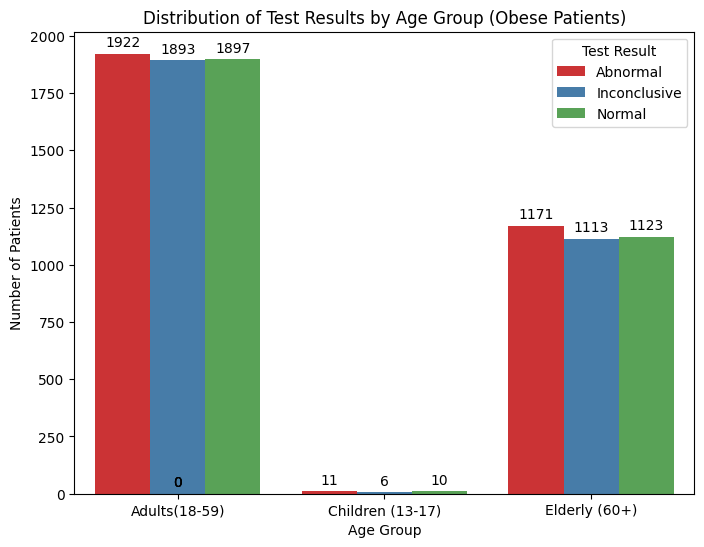

In [39]:
# Count number of obese patients by Age_group and Test_Result
age_test_table = obesity_df.groupby(["Age_group", "Test Results"]).size().unstack(fill_value=0)

print("Obese Patients by Age Group and Test Result:\n")
print(age_test_table)


# Prepare data
age_test_long = obesity_df.groupby(["Age_group", "Test Results"]).size().reset_index(name="Count")

plt.figure(figsize=(8,6))
ax = sns.barplot(data=age_test_long, x="Age_group", y="Count", hue="Test Results", palette="Set1")

# Add metrics on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # no decimals
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'bottom',
        fontsize=10, color='black', xytext=(0, 3),
        textcoords='offset points'
    )

plt.title("Distribution of Test Results by Age Group (Obese Patients)")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.legend(title="Test Result")
plt.show()

In [60]:

custom_colors = ["#FF8533", "#ECA271", "#A84909"]  # replace/add colors as needed
fig = px.pie(
    obesity_df,
    names='Test Results',
    facet_col='Age_group',
    hole=0.6, 
    color_discrete_sequence=custom_colors,     # slightly smaller hole to give space for labels
    width=800,              # wider figure for multiple facets
    height=400,
                 # taller figure for readability
)

# Set black background and white text
fig.update_layout(
    paper_bgcolor='black',   # background outside the plot
    plot_bgcolor='black',    # background inside the plot
    font=dict(color='white', size=12), # smaller font for title/labels
    
)



# Update slice labels to white and smaller to fit inside donut
fig.update_traces(
    textinfo='percent+label',  
    textfont_size=10,          # smaller font
    textfont_color='white'
)

# Remove grid lines (mainly affects axes if they appear)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()

# Save optimized chart
fig.write_image("charts/test_results_donut_black_bg_optimized.png", scale=2)

In [61]:
# Prepare data
age_test_long = obesity_df.groupby(["Age_group", "Test Results"]).size().reset_index(name="Count")

# Plot grouped bar chart
fig = px.bar(
    age_test_long,
    x="Age_group",
    y="Count",
    color="Test Results",
    barmode="group",
    text="Count",
    labels={"Age_group": "Age Group", "Count": "Number of Patients"},
    width=600,   # adjust width 
    height=500,   # adjust height 
)

# Update aesthetics
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis=dict(tickangle=0),
    legend_title="Test Result",
    bargap=0.15,
    bargroupgap=0.1,
    paper_bgcolor='black',   # background outside the plot
    plot_bgcolor='black',    # background inside the plot
    font=dict(color='white'), 
)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)


fig.show()
fig.write_image("charts/test_result_by_age_group.png", scale=2)

   Insurance Provider         Age_group  Count
0               Aetna     Adults(18-59)   1112
1               Aetna  Children (13-17)      3
2               Aetna     Elderly (60+)    667
3          Blue Cross     Adults(18-59)   1155
4          Blue Cross  Children (13-17)      5
5          Blue Cross     Elderly (60+)    712
6               Cigna     Adults(18-59)   1182
7               Cigna  Children (13-17)      3
8               Cigna     Elderly (60+)    662
9            Medicare     Adults(18-59)   1165
10           Medicare  Children (13-17)     11
11           Medicare     Elderly (60+)    663
12   UnitedHealthcare     Adults(18-59)   1098
13   UnitedHealthcare  Children (13-17)      5
14   UnitedHealthcare     Elderly (60+)    703


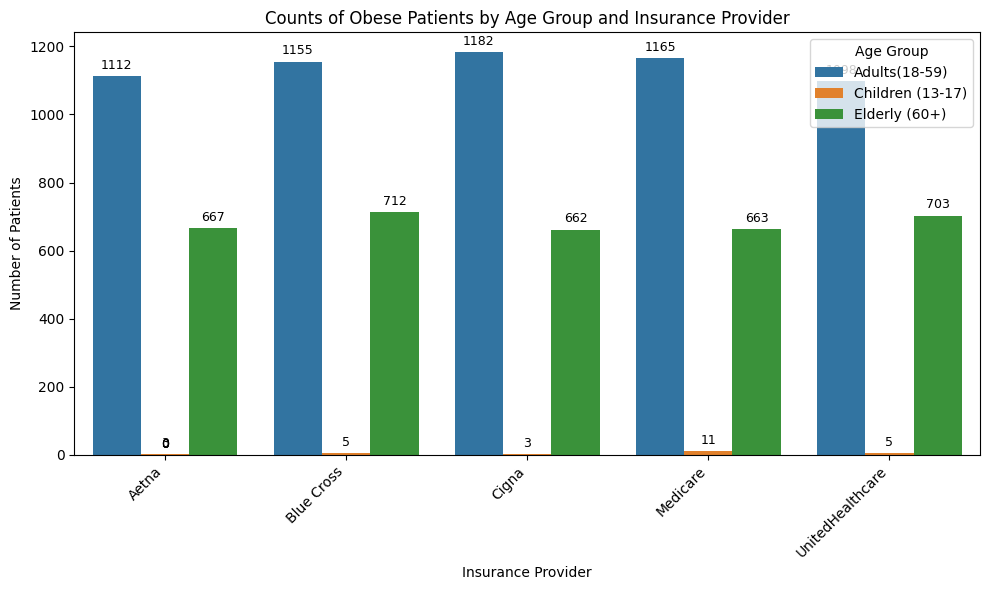

In [42]:
# --- Create table ---
age_insurance_counts = obesity_df.groupby(["Insurance Provider", "Age_group"]).size().reset_index(name="Count")

print(age_insurance_counts)

# --- Visualisation ---
plt.figure(figsize=(10,6))
ax = sns.barplot(data=age_insurance_counts, x="Insurance Provider", y="Count", hue="Age_group")

# Add metrics on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # raw count
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom',
        fontsize=9, color='black', xytext=(0, 3),
        textcoords='offset points'
    )

plt.title("Counts of Obese Patients by Age Group and Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()

In [62]:
# --- Create table ---
age_insurance_counts = obesity_df.groupby(["Insurance Provider", "Age_group"]).size().reset_index(name="Count")

# --- Plot with Plotly ---
fig = px.bar(
    age_insurance_counts,
    x="Insurance Provider",
    y="Count",
    color="Age_group",
    barmode="group",   # side-by-side bars for each Age_group
    text="Count",
    labels={"Count": "Number of Patients", "Insurance Provider": "Insurance Provider", "Age_group": "Age Group"},
    color_discrete_sequence=px.colors.qualitative.Set1, # match seaborn style
    width=800,   # adjust width for PowerPoint
    height=500,   # adjust height for PowerPoint 
)

# --- Update aesthetics ---
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis=dict(tickangle=0),
    legend_title="Age Group",
    bargap=0.15,
    bargroupgap=0.1,
    paper_bgcolor='black',   # background outside the plot
    plot_bgcolor='black',    # background inside the plot
    font=dict(color='white'), 
)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False, title_text='', showticklabels=False)


fig.show()
fig.write_image("charts/insurance_provider_by_age_group.png", scale=2)
print(age_insurance_counts)

   Insurance Provider         Age_group  Count
0               Aetna     Adults(18-59)   1112
1               Aetna  Children (13-17)      3
2               Aetna     Elderly (60+)    667
3          Blue Cross     Adults(18-59)   1155
4          Blue Cross  Children (13-17)      5
5          Blue Cross     Elderly (60+)    712
6               Cigna     Adults(18-59)   1182
7               Cigna  Children (13-17)      3
8               Cigna     Elderly (60+)    662
9            Medicare     Adults(18-59)   1165
10           Medicare  Children (13-17)     11
11           Medicare     Elderly (60+)    663
12   UnitedHealthcare     Adults(18-59)   1098
13   UnitedHealthcare  Children (13-17)      5
14   UnitedHealthcare     Elderly (60+)    703


In [44]:
# --- Create table ---
age_insurance_counts = obesity_df.groupby(["Insurance Provider", "Age_group"]).size().reset_index(name="Count")

# --- Plot with Plotly (stacked bar) ---
fig = px.bar(
    age_insurance_counts,
    x="Insurance Provider",
    y="Count",
    color="Age_group",
    barmode="stack",   # stacked bars instead of side-by-side
    text="Count",
    title="Counts of Obese Patients by Age Group and Insurance Provider",
    labels={"Count": "Number of Patients", "Insurance Provider": "Insurance Provider", "Age_group": "Age Group"},
    color_discrete_sequence=px.colors.qualitative.Set1, # match seaborn style
    width=700,   # slightly wider for stacked bars
    height=500,
)

# --- Update aesthetics ---
fig.update_traces(
    textposition="inside",   # counts inside the stacked bars
    textfont_color='white'   # white text for readability
)

fig.update_layout(
    xaxis=dict(tickangle=45),
    legend_title="Age Group",
    bargap=0.15,
    bargroupgap=0.1,
    paper_bgcolor='black',   # background outside the plot
    plot_bgcolor='black',    # background inside the plot
    font=dict(color='white', size=12),
    title=dict(font=dict(color='white', size=16))
)

# Remove grid lines
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

# --- Show and save ---
fig.show()
fig.write_image("charts/insurance_provider_by_age_group_stacked.png", scale=2)

In [45]:
px.bar(age_insurance_counts, x='Insurance Provider', y='Count', color='Age_group', text_auto=True)

Hospital
Ltd Smith       11
Smith Group     10
LLC Williams     8
Johnson Inc      8
Inc Jones        7
Inc Johnson      7
Lee PLC          6
Williams Ltd     6
Inc Harris       6
PLC Smith        6
Name: count, dtype: int64


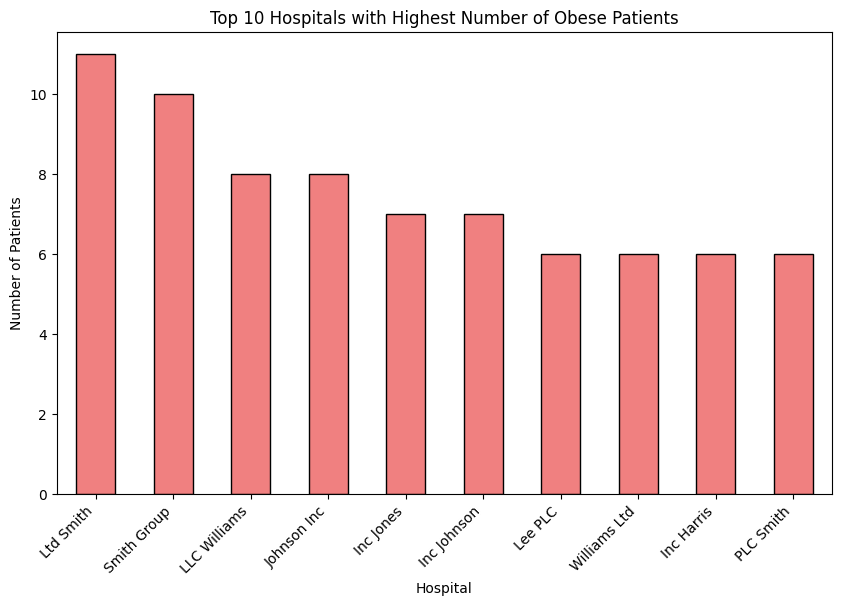

In [46]:
# Top 10 hospitals with most obese patients
top10_hospitals = obesity_df["Hospital"].value_counts().head(10)

print(top10_hospitals)

plt.figure(figsize=(10,6))
top10_hospitals.plot(kind="bar", color="lightcoral", edgecolor="black")


# Add metrics on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # raw count
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom',
        fontsize=9, color='black', xytext=(0, 3),
        textcoords='offset points'
    )
plt.title("Top 10 Hospitals with Highest Number of Obese Patients")
plt.xlabel("Hospital")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha="right")  # rotate hospital names
plt.show()


In [47]:
obesity_df.head(2)

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
1  leslie terry   62    Male         A+           Obesity        2019-08-20   
2   danny smith   76  Female         A-           Obesity        2022-09-22   

             Doctor  Hospital Insurance Provider  Billing Amount  Room Number  \
1   Samantha Davies   Kim Inc           Medicare    33643.327287          265   
2  Tiffany Mitchell  Cook PLC              Aetna    27955.096079          205   

  Admission Type Discharge Date Medication  Test Results  \
1      Emergency     2019-08-26  Ibuprofen  Inconclusive   
2      Emergency     2022-10-07    Aspirin        Normal   

   Number of Days Admitted          Stay_Category      Age_group  
1                        6  Short Stay (<15 days)  Elderly (60+)  
2                       15   Long Stay (≥15 days)  Elderly (60+)

In [63]:

custom_colors = ["#FF8533", "#ECA271"]  # replace/add colors as needed

# --- Step 1: Top 10 hospitals ---
top10_hospitals = obesity_df["Hospital"].value_counts().head(10).index

# --- Step 2: Filter dataset ---
top10_data = obesity_df[obesity_df["Hospital"].isin(top10_hospitals)]

# --- Step 3: Group by Hospital and Gender ---
hospital_gender_counts = top10_data.groupby(["Hospital", "Gender"]).size().reset_index(name="Count")

# --- Step 3b: Compute total patients per hospital for sorting ---
hospital_totals = hospital_gender_counts.groupby("Hospital")["Count"].sum().reset_index()
hospital_totals = hospital_totals.sort_values("Count", ascending=True)  # ascending order

# --- Step 3c: Set Hospital as categorical to enforce order ---
hospital_gender_counts["Hospital"] = pd.Categorical(
    hospital_gender_counts["Hospital"],
    categories=hospital_totals["Hospital"],
    ordered=True
)

# --- Step 4: Plot stacked bar chart ---
fig = px.bar(
    hospital_gender_counts,
    x="Hospital",
    y="Count",
    color="Gender",
    barmode="stack",
    text="Count",
    labels={"Count": "Number of Patients", "Hospital": "Hospital"},
    color_discrete_sequence=custom_colors
)

# --- Step 5: Customize aesthetics ---
fig.update_traces(textposition="inside")
fig.update_layout(
    plot_bgcolor='black',    
    paper_bgcolor='black',   
    font_color='white',      
    xaxis=dict(tickangle=45, showgrid=False),
    yaxis=dict(showgrid=False),
    legend_title="Gender",
    bargap=0.2
)

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)

fig.show()
fig.write_image("charts/top10_hospitals_with_highest_obese_patients.png", scale=2)


In [49]:
# --- Top 10 hospitals with most obese patients ---
top10_hospitals = obesity_df["Hospital"].value_counts().head(10).reset_index()
top10_hospitals.columns = ["Hospital", "Count"]

# --- Plot with Plotly ---
fig = px.bar(
    top10_hospitals,
    x="Hospital",
    y="Count",
    text="Count",
    title="Top 10 Hospitals with Highest Number of Obese Patients",
    labels={"Hospital": "Hospitals", "Count": "Number of Patients"},
    color_discrete_sequence=["lightcoral"],
    width=600,   # adjust width for PowerPoint
    height=500,
)

# --- Update aesthetics ---
fig.update_traces(textposition="outside", marker_line_color="black", marker_line_width=1.5)
fig.update_layout(
    xaxis=dict(tickangle=45),
    bargap=0.2,
    paper_bgcolor='black',   # background outside the plot
    plot_bgcolor='black',    # background inside the plot
    font=dict(color='white'), 
)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)

fig.show()
fig.write_image("charts/top10_hospitals_with_highest_obese patients.png", scale=2)

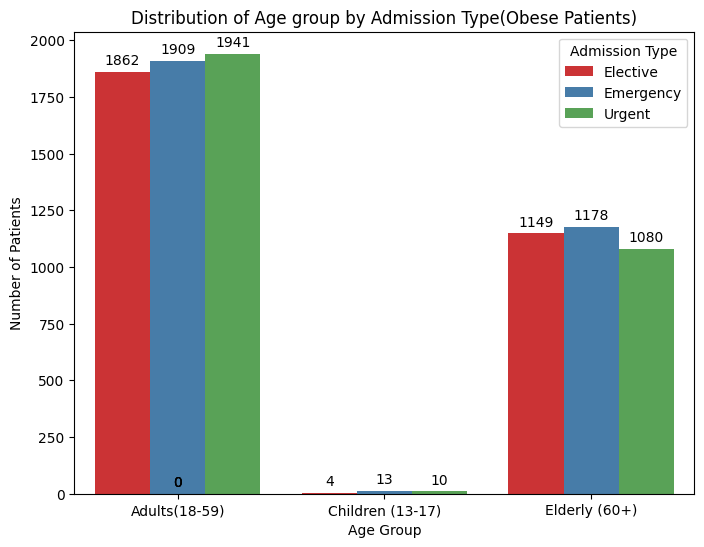

In [50]:
# Prepare data
admission_type_age = obesity_df.groupby(["Age_group", "Admission Type"]).size().reset_index(name="Count")

plt.figure(figsize=(8,6))
ax = sns.barplot(data=admission_type_age, x="Age_group", y="Count", hue="Admission Type", palette="Set1")

# Add metrics on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # no decimals
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'bottom',
        fontsize=10, color='black', xytext=(0, 3),
        textcoords='offset points'
    )

plt.title("Distribution of Age group by Admission Type(Obese Patients)")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.legend(title="Admission Type")
plt.show()

In [64]:
# --- Prepare data ---
admission_type_age = obesity_df.groupby(["Age_group", "Admission Type"]).size().reset_index(name="Count")

# --- Plot with Plotly ---
fig = px.bar(
    admission_type_age,
    x="Age_group",
    y="Count",
    color="Admission Type",
    barmode="group",   # side-by-side bars
    text="Count",
    labels={"Age_group": "Age Groups", "Count": "Number of Patients"},
    width=600,   # adjust width for PowerPoint
    height=500,
    
)

# --- Update aesthetics ---
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis=dict(tickangle=0),
    legend_title="Admission Type",
    bargap=0.15,
    bargroupgap=0.1,
    paper_bgcolor='black',   # background outside the plot
    plot_bgcolor='black',    # background inside the plot
    font=dict(color='white'), # text color
)

# Remove grid lines
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)



fig.show()
fig.write_image("charts/age_group_by_admission_type.png", scale=2)
print(admission_type_age)

          Age_group Admission Type  Count
0     Adults(18-59)       Elective   1862
1     Adults(18-59)      Emergency   1909
2     Adults(18-59)         Urgent   1941
3  Children (13-17)       Elective      4
4  Children (13-17)      Emergency     13
5  Children (13-17)         Urgent     10
6     Elderly (60+)       Elective   1149
7     Elderly (60+)      Emergency   1178
8     Elderly (60+)         Urgent   1080


In [52]:
total_hospitals = obesity_df["Hospital"].nunique()
total_doctors = obesity_df["Doctor"].nunique()
print("Total number of hospitals with obese patients:", total_hospitals)
print("Total number of doctors that treated obese patients:", total_doctors)

Total number of hospitals with obese patients: 7640
Total number of doctors that treated obese patients: 7862


Stay_Category     Long Stay (≥15 days)  Short Stay (<15 days)
Age_group                                                    
Adults(18-59)                     3000                   2712
Children (13-17)                    13                     14
Elderly (60+)                     1830                   1577


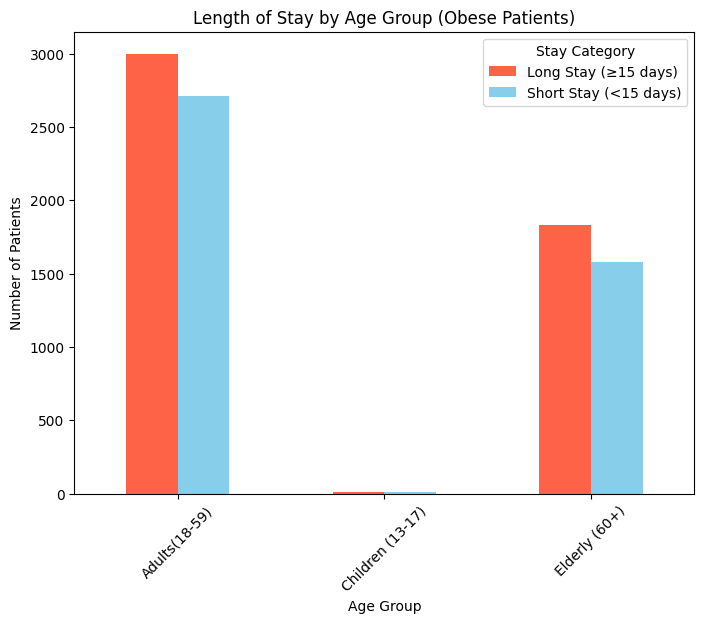

In [53]:
obesity_df["Stay_Category"] = obesity_df["Number of Days Admitted"].apply(
    lambda x: "Short Stay (<15 days)" if x < 15 else "Long Stay (≥15 days)"
)

stay_summary = obesity_df.groupby(["Age_group", "Stay_Category"]).size().unstack(fill_value=0)
print(stay_summary)

stay_summary.plot(kind="bar", figsize=(8,6), color=["tomato", "skyblue"])

plt.title("Length of Stay by Age Group (Obese Patients)")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.legend(title="Stay Category")
plt.show()


In [65]:
# Prepare data
obesity_df["Stay_Category"] = obesity_df["Number of Days Admitted"].apply(
    lambda x: "Short Stay (<15 days)" if x < 15 else "Long Stay (≥15 days)"
)

stay_summary = obesity_df.groupby(["Age_group", "Stay_Category"]).size().reset_index(name="Count")

# Plot with Plotly
fig = px.bar(
    stay_summary,
    x="Age_group",
    y="Count",
    color="Stay_Category",
    barmode="group",  # side-by-side comparison
    text="Count",
    labels={"Age_group": "Age Group", "Count": "Number of Patients", "Stay_Category": "Stay Category"},
    color_discrete_sequence=["tomato", "skyblue"],
    width=600,   # adjust width for PowerPoint
    height=500,
)

#Update aesthetics
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis=dict(tickangle=0),
    bargap=0.15,
    bargroupgap=0.1,
    paper_bgcolor='black',   # background outside the plot
    plot_bgcolor='black',    # background inside the plot
    font=dict(color='white'), # text color
)

# Remove grid lines
fig.update_xaxes(showgrid=False, zeroline=False, title='')
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)

    


fig.show()
fig.write_image("charts/length_of_stay_by_age_group.png", scale=2)

print(stay_summary)

          Age_group          Stay_Category  Count
0     Adults(18-59)   Long Stay (≥15 days)   3000
1     Adults(18-59)  Short Stay (<15 days)   2712
2  Children (13-17)   Long Stay (≥15 days)     13
3  Children (13-17)  Short Stay (<15 days)     14
4     Elderly (60+)   Long Stay (≥15 days)   1830
5     Elderly (60+)  Short Stay (<15 days)   1577


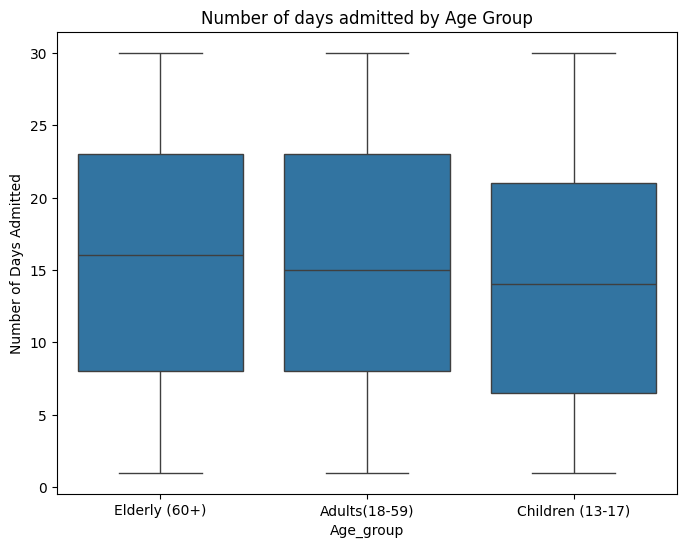

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Age_group", y="Number of Days Admitted", data=obesity_df)
plt.title("Number of days admitted by Age Group")
plt.show()

In [56]:
from scipy.stats import chi2_contingency

In [57]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example: Gender vs Age_group
cramers_v(obesity_df["Gender"], obesity_df["Age_group"])

np.float64(0.0)

### What it means:

Cramer’s V = 0.0 → means there is no association between Gender and Age_group in your data.

In other words, the distribution of males vs. females looks the same across Adults, Children, Elderly.

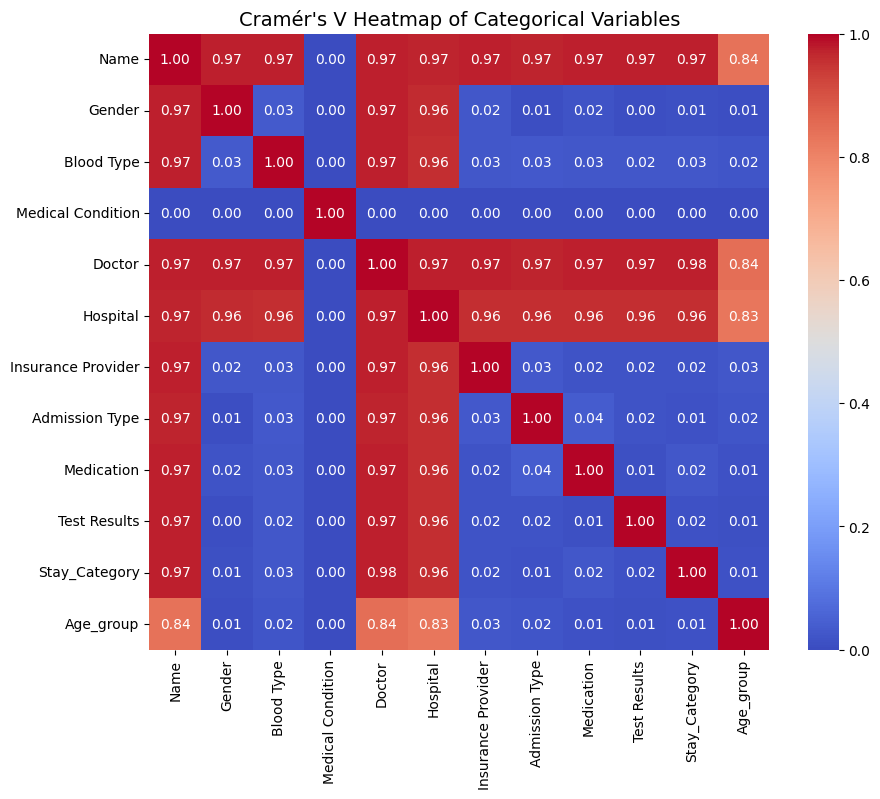

In [58]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# --- Function to calculate Cramér's V ---
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt((chi2 / n) / min_dim) if min_dim > 0 else 0

# --- Select categorical columns ---
categorical_cols = obesity_df.select_dtypes(include=["object", "category", "bool"]).columns

# --- Compute Cramér’s V matrix ---
cramers_results = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            cramers_results.loc[col1, col2] = cramers_v(obesity_df[col1], obesity_df[col2])

cramers_results = cramers_results.astype(float)

# --- Plot heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Cramér's V Heatmap of Categorical Variables", fontsize=14)
plt.show()


In [59]:
import plotly.express as px
from plotly.subplots import make_subplots

# --- Create 2x2 dashboard: 3 pies + 1 bar ---
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "xy"}]],  # last chart is bar
    subplot_titles=("Proportion of Obese Patients", "Distribution of Gender", 
                    "Distribution of Test Results Acroos Age Groups", 
                    "Gender Distribution Across Age Groups")
)

custom_colors = ["#9A4A08", "#F2AA70"]

# --- Pie 1: Obesity ---
pie1 = px.pie(df, names='obesity', color_discrete_sequence=custom_colors)
for i, trace in enumerate(pie1.data):
    trace.textinfo = 'percent+label'
    trace.textfont = dict(color='white', size=12)
    trace.showlegend = (i == 0)  # only show legend for first slice
    fig.add_trace(trace, row=1, col=1)

# --- Pie 2: Gender ---
pie2 = px.pie(obesity_df, names='Gender', color_discrete_sequence=custom_colors)
for i, trace in enumerate(pie2.data):
    trace.textinfo = 'percent+label'
    trace.textfont = dict(color='white', size=12)
    trace.showlegend = (i == 0)
    fig.add_trace(trace, row=1, col=2)

# --- Pie 3: Test Results ---
pie3 = px.pie(
    obesity_df,
    names='Test Results',
    facet_col='Age_group',
    hole=0.6, 
    color_discrete_sequence=custom_colors,     # slightly smaller hole to give space for labels
    width=800,              # wider figure for multiple facets
    height=400,
)
for i, trace in enumerate(pie3.data):
    trace.textinfo = 'percent+label'
    trace.textfont = dict(color='white', size=12)
    trace.showlegend = (i == 0)
    fig.add_trace(trace, row=2, col=1)

# --- Bar chart: Age-Gender ---
bar1 = px.bar(
    age_gender_counts,
    x="Age_group",
    y="Count",
    color="Gender",
    barmode="group",
    text="Count",
    color_discrete_sequence=["#FF8533", "#ECA271"]
)
for trace in bar1.data:
    trace.textposition = "outside"
    trace.textfont = dict(color='white', size=12)
    trace.showlegend = True
    fig.add_trace(trace, row=2, col=2)

# --- Layout customizations ---
fig.update_layout(
    height=1000,
    width=900,
    title_text="Demographics of Obese Patients",
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    legend=dict(
        x=1.05,  # position outside right of dashboard
        y=1,
        font=dict(color='white', size=12),
        bgcolor='black'
    )
)

# Remove gridlines for bar chart
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()

fig.write_image("charts/length_of_stay_by_age_group.png", scale=2)

